In [2]:
%matplotlib notebook
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import GMAPS_key


In [3]:
obgyn_by_county = "obgyn_by_county.csv"
underlying_cause = "underlying_cause.csv"
population_data = "Population_DataHR.csv"
household_income_levels = "household-income-levels.csv"
median_income = "median-household-income.csv"

In [4]:
obgyn_by_county_df = pd.read_csv(obgyn_by_county, encoding="ISO-8859-1")
underlying_cause_df = pd.read_csv(underlying_cause, encoding="ISO-8859-1")
population_data_df = pd.read_csv(population_data, encoding="ISO-8859-1")
household_income_levels_df = pd.read_csv(household_income_levels, encoding="ISO-8859-1")
median_income_df = pd.read_csv(median_income, encoding="ISO-8859-1")

In [5]:
obgyn_by_county_df.head()

,County Name,Providers Count
0,ADAMS,5
1,ALLEN,182
2,BARTHOLOMEW,13
3,BOONE,8
4,CASS,6


<IPython.core.display.Javascript object>


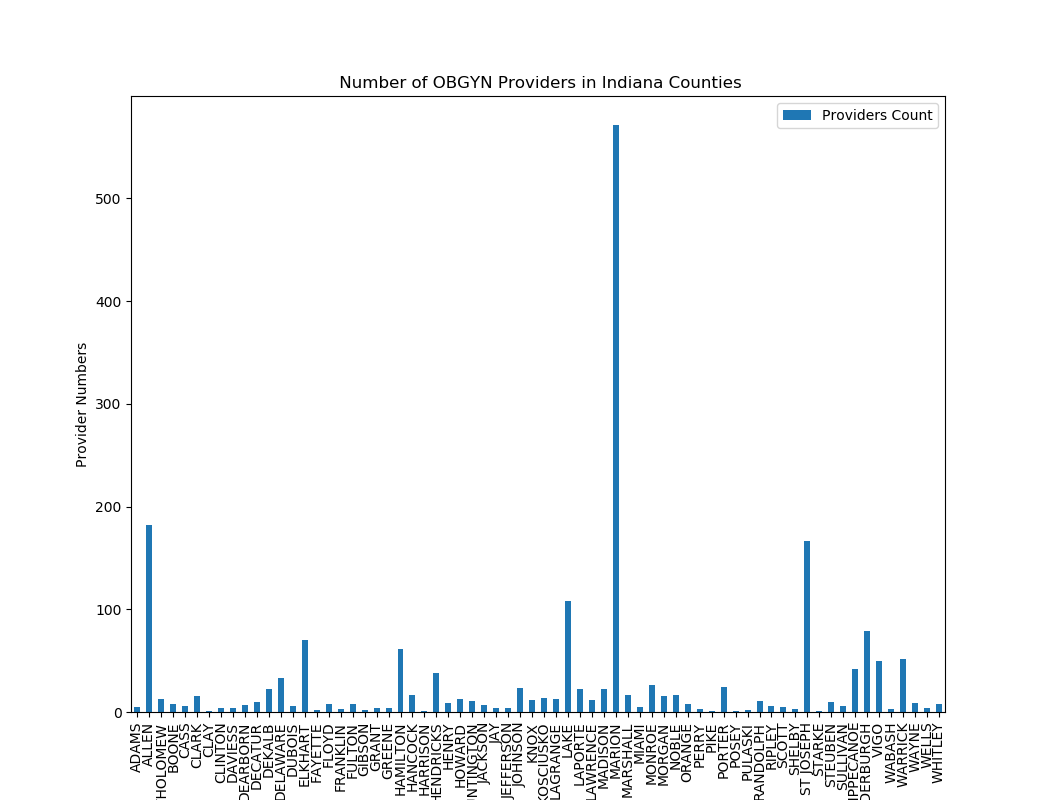

Text(0.5, 1.0, ' Number of OBGYN Providers in Indiana Counties')

In [6]:
obgyn_by_county_df.plot(x="County Name", y="Providers Count",kind ="bar",figsize=(10.5,8))
plt.xticks(rotation=90)
plt.ylabel("Provider Numbers")
plt.xlabel("Indiana County")
plt.title(" Number of OBGYN Providers in Indiana Counties")

In [7]:
obgyn_by_county_df.describe()

,Providers Count
count,68.000000
mean,28.750000
std,74.668496
min,1.000000
25%,4.000000
50%,9.000000
75%,22.000000
max,571.000000


In [8]:
underlying_cause_df.head()

,CNTY,CHILD_DEATH_YR,UNDERLYING_COD,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
0,ADAMS,2010,Other specified noninfective disorders of lymp...,1,4,25.0,34387,1.16
1,ADAMS,2010,Unspecified pulmonary hemorrhage originating i...,1,4,25.0,34387,1.16
2,ADAMS,2010,"Congenital malformation of the heart, unspecified",1,4,25.0,34387,1.16
3,ADAMS,2010,"Polycystic kidney, unspecified",1,4,25.0,34387,1.16
4,ADAMS,2011,Primary atelectasis of newborn,1,5,20.0,34384,1.45


In [16]:
underlying_2015 = underlying_cause_df[underlying_cause_df["CHILD_DEATH_YR"].isin([2015])]
underlying_2015

,CNTY,CHILD_DEATH_YR,UNDERLYING_COD,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
14,ADAMS,2015,Other viral infections of unspecified site,1,3,33.3333,34967,0.85
15,ADAMS,2015,Unspecified pulmonary hemorrhage originating i...,1,3,33.3333,34967,0.85
16,ADAMS,2015,Sepsis of newborn due to Escherichia coli,1,3,33.3333,34967,0.85
104,ALLEN,2015,Sudden infant death syndrome,4,21,19.0476,368040,0.57
105,ALLEN,2015,"Congenital malformation of the heart, unspecified",3,21,14.2857,368040,0.57
...,...,...,...,...,...,...,...,...
2343,WAYNE,2015,"Encephalopathy, unspecified",1,5,20.0000,66984,0.74
2344,WAYNE,2015,Anencephaly,1,5,20.0000,66984,0.74
2345,WAYNE,2015,Renal dysplasia,1,5,20.0000,66984,0.74
2361,WELLS,2015,"Multiple congenital malformations, not elsewhe...",1,1,100.0000,27937,0.35


In [17]:
underlying_2016 = underlying_cause_df[underlying_cause_df["CHILD_DEATH_YR"].isin([2016])]
underlying_2016

,CNTY,CHILD_DEATH_YR,UNDERLYING_COD,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
17,ADAMS,2016,Other reduction deformities of brain,1,6,16.6666,35232,1.70
18,ADAMS,2016,Hydrops fetalis not due to hemolytic disease,1,6,16.6666,35232,1.70
19,ADAMS,2016,"Congenital malformation of the heart, unspecified",1,6,16.6666,35232,1.70
20,ADAMS,2016,Primary atelectasis of newborn,1,6,16.6666,35232,1.70
21,ADAMS,2016,"Sepsis of newborn due to streptococcus, group B",1,6,16.6666,35232,1.70
...,...,...,...,...,...,...,...,...
2347,WAYNE,2016,"Congenital malformation of the heart, unspecified",1,2,50.0000,66568,0.30
2384,WHITLEY,2016,Hypoplastic right heart syndrome,1,4,25.0000,33449,1.19
2385,WHITLEY,2016,"Chromosomal abnormality, unspecified",1,4,25.0000,33449,1.19
2386,WHITLEY,2016,Acute tracheitis,1,4,25.0000,33449,1.19


In [18]:
underlying_2017 = underlying_cause_df[underlying_cause_df["CHILD_DEATH_YR"].isin([2017])]
underlying_2017

,CNTY,CHILD_DEATH_YR,UNDERLYING_COD,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
23,ADAMS,2017,Accidental suffocation and strangulation in bed,2,6,33.3333,35232,1.70
24,ADAMS,2017,Disorders of glycine metabolism,1,6,16.6666,35232,1.70
25,ADAMS,2017,Hyperkalemia,1,6,16.6666,35232,1.70
26,ADAMS,2017,Unspecified chronic respiratory disease origin...,1,6,16.6666,35232,1.70
27,ADAMS,2017,Sudden infant death syndrome,1,6,16.6666,35232,1.70
...,...,...,...,...,...,...,...,...
2372,WHITE,2017,Anencephaly,1,2,50.0000,23999,0.83
2388,WHITLEY,2017,Accidental suffocation and strangulation in bed,1,4,25.0000,33449,1.19
2389,WHITLEY,2017,"Bronchopneumonia, unspecified",1,4,25.0000,33449,1.19
2390,WHITLEY,2017,"Chromosomal abnormality, unspecified",1,4,25.0000,33449,1.19


In [19]:
underlying_2018 = underlying_cause_df[underlying_cause_df["CHILD_DEATH_YR"].isin([2018])]
underlying_2018

,CNTY,CHILD_DEATH_YR,UNDERLYING_COD,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
28,ADAMS,2018,Other specified cerebrovascular diseases,1,4,25.0000,35232,1.13
29,ADAMS,2018,Extreme immaturity,1,4,25.0000,35232,1.13
30,ADAMS,2018,Extremely low birthweight,1,4,25.0000,35232,1.13
31,ADAMS,2018,Sudden infant death syndrome,1,4,25.0000,35232,1.13
32,ADAMS,2018,"Intrauterine hypoxia, unspecified",1,4,25.0000,35232,1.13
...,...,...,...,...,...,...,...,...
2362,WELLS,2018,Newborn affected by chorioamnionitis,1,1,100.0000,27949,0.35
2373,WHITE,2018,Sudden infant death syndrome,1,3,33.3333,23999,1.25
2374,WHITE,2018,Unspecified intraventricular (nontraumatic) he...,1,3,33.3333,23999,1.25
2375,WHITE,2018,"Edwards' syndrome, unspecified",1,3,33.3333,23999,1.25


In [19]:
underlying_cause_df.describe()

,CHILD_DEATH_YR,CNT_BY_UNDERLYING_COD,CNTY_YR_DEATH_TOTAL,PCT_CNTY_YR_TOTAL,CHILD_DEATH_CNTY_POP,CNTY_YR_DEATH_TOTAL_PER_10000_CNTY_RES
count,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,2014.029252,1.193481,16.910990,24.713725,272709.632679,0.661463
std,2.531239,0.717501,21.224887,26.714584,308761.865396,0.340800
min,2010.000000,1.000000,1.000000,1.388800,8166.000000,0.050000
25%,2012.000000,1.000000,3.000000,6.250000,44013.000000,0.440000
50%,2014.000000,1.000000,7.000000,16.666600,143535.000000,0.620000
75%,2016.000000,1.000000,19.000000,33.333300,363265.000000,0.770000
max,2018.000000,11.000000,72.000000,100.000000,941229.000000,3.150000


In [20]:
population_data_df.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,"308,745,538","308,758,105","309,321,666","311,556,874","313,830,990","315,993,715","318,301,008","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
1,Northeast,"55,317,240","55,318,443","55,380,134","55,604,223","55,775,216","55,901,806","56,006,011","56,034,684","56,042,330","56,059,240","56,046,620","55,982,803"
2,Midwest,"66,927,001","66,929,725","66,974,416","67,157,800","67,336,743","67,560,379","67,745,167","67,860,583","67,987,540","68,126,781","68,236,628","68,329,004"
3,South,"114,555,744","114,563,030","114,866,680","116,006,522","117,241,208","118,364,400","119,624,037","120,997,341","122,351,760","123,542,189","124,569,433","125,580,448"
4,West,"71,945,553","71,946,907","72,100,436","72,788,329","73,477,823","74,167,130","74,925,793","75,742,555","76,559,681","77,257,329","77,834,820","78,347,268"


In [21]:
population_data_df.describe()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,62,57,57,57,57,57,57,57,57,57,57,57,57
unique,62,57,57,57,57,57,57,57,57,57,57,57,57
top,.Nebraska,"2,700,551","1,316,462","2,775,332","5,121,108","701,176","4,764,080","12,788,313","3,120,960","11,634,370","1,424,393","10,511,131","1,787,065"
freq,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
household_income_levels_df.head()

,geoid,geoname,sumlev,year,table_id,table_line,description,est,moe
0,04000US18,Indiana,40,2009,B19001,1,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,2468006,7798
1,04000US18,Indiana,40,2009,B19001,2,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,183110,2697
2,04000US18,Indiana,40,2009,B19001,3,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,140573,2471
3,04000US18,Indiana,40,2009,B19001,4,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,140059,2812
4,04000US18,Indiana,40,2009,B19001,5,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN INF...,147019,2599


In [11]:
household_income_levels_df.describe()

,sumlev,year,table_line,est,moe
count,545275.000000,545275.000000,545275.000000,5.452750e+05,545275.000000
mean,235.294528,2012.510304,9.000000,7.728901e+02,87.188991
std,261.373177,2.288169,4.898984,1.110445e+04,113.291765
min,40.000000,2009.000000,1.000000,0.000000e+00,2.000000
25%,60.000000,2011.000000,5.000000,2.800000e+01,27.000000
50%,140.000000,2013.000000,9.000000,8.800000e+01,56.000000
75%,160.000000,2015.000000,13.000000,2.720000e+02,106.000000
max,970.000000,2016.000000,17.000000,2.513828e+06,8128.000000


In [12]:
median_income_df.head()

,geoid,geoname,sumlev,year,table_id,table_line,description,est,moe
0,04000US18,Indiana,40,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,47465.0,193.0
1,05000US18001,"Adams County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,43208.0,2508.0
2,05000US18003,"Allen County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,47901.0,799.0
3,05000US18005,"Bartholomew County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,52545.0,1858.0
4,05000US18007,"Benton County, Indiana",50,2009,B19013,1,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,45603.0,2358.0


In [13]:
median_income_df.describe()

,sumlev,year,table_line,est,moe
count,36889.000000,36889.000000,36889.0,36682.000000,36668.000000
mean,224.163626,2012.704709,1.0,49696.370263,9142.744627
std,245.413460,2.191892,0.0,17720.245788,10337.963607
min,40.000000,2009.000000,1.0,3220.000000,193.000000
25%,140.000000,2011.000000,1.0,39167.000000,4019.000000
50%,140.000000,2013.000000,1.0,47598.000000,6684.000000
75%,160.000000,2014.000000,1.0,57631.250000,10857.250000
max,970.000000,2016.000000,1.0,250001.000000,347683.000000
